In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
email=pd.read_csv('/content/spam.csv',encoding='latin-1')
# print(type(email))

Preprocessing of data

In [ ]:
email.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
email.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
email.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
email.rename(columns={'v1':'spam','v2':'text'}, inplace=True)
email

,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
len(email)
len(email[email.spam=='ham'])
len(email[email.spam=='spam'])

747

In [ ]:
x=email["text"]
y=email["spam"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


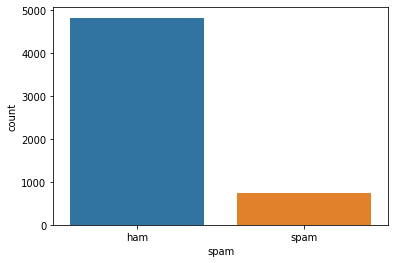

In [ ]:
import seaborn as sns
sns.countplot(y)

Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Stopping word selection

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv1=TfidfVectorizer(stop_words='english')
x_traincv=cv1.fit_transform(x_train)

In [ ]:
a=x_traincv.toarray()

In [ ]:
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
a[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
cv1.inverse_transform(a[0])

[array(['amla', 'durban', 'ground', 'home', 'kallis', 'town'], dtype='<U32')]

In [ ]:
x_train.iloc[0]

'No no:)this is kallis home ground.amla home town is durban:)'

Model Selection

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [ ]:
y_train=y_train.astype('str')

In [115]:
mnb.fit(x_traincv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [116]:
x_testcv=cv1.transform(x_test)

In [118]:
pred=mnb.predict(x_testcv)
pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [119]:
actual=np.array(y_test)
actual

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [121]:
#Accuracy
count=0
for i in range (len(pred)):
    if pred[i]==actual[i]:
        count=count+1
accuracy = count/len(pred)
print(accuracy)

0.9659192825112107


In [122]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,pred)
conf

array([[949,   0],
       [ 38, 128]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


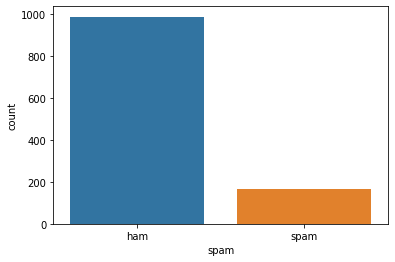

In [123]:
#ploting actual values
sns.countplot(y_test)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


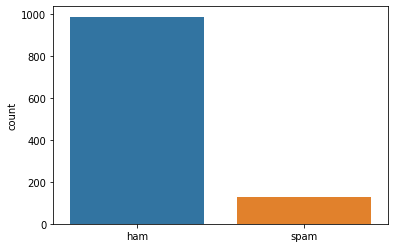

In [124]:
#ploting predicted values
sns.countplot(pred)